In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss
import os

# Simulated data

## Without variance constraint

### 2 components

In [92]:
def PlotGMM(X,iteration_data,plotper_iter:int,thresholds,title_name:str,ylimit,mean,sd):
    c=['red','green','blue','magenta','darkorange','slategray']
    gmm_datapoints=np.linspace(np.min(X),np.max(X),100)
    for i in range(len(iteration_data)):
        if  i % 5 ==0 :
            #Set figure size, title, and plot the data points
            fig=plt.figure(figsize=(8,5))
            plt.title(title_name)
            # plt.scatter(X, [0.005] * len(X), color='mediumslateblue', s=15, marker="|", label="Data points")
            plt.hist(X,bins=75,density=True)

            for i in range(len(mean)):
                plt.plot(gmm_datapoints, gauss.GaussianPDF(gmm_datapoints, mean[i], sd[i]), color='black', label="True distribution {}".format(i+1))
            
            #Plot the estimated pdf
            for k in range(len(iteration_data[i])):
                plt.plot(gmm_datapoints,gauss.GaussianPDF(gmm_datapoints, iteration_data[i][k]['Mean'], iteration_data[i][k]['Variance']), color=c[k], label="Estimated distribution {}".format(k+1))
            
            if ylimit==[]:
                pass
            else:
                plt.ylim(0,ylimit)
                
            #Set the x and y label
            plt.xlabel("x")
            plt.ylabel("Density")
            
            
            if i==len(iteration_data)-1:
        
                for i in range (len(thresholds)):
                    if i==0:
                        label_name="Thresholds"
                    else:
                        label_name=None
                    plt.axvline(thresholds[i],c='red',ls='--',lw=0.5,label=label_name)
            
            # # Plot ghost gaussian
            # if mean_ghost==[]:
            #     pass
            # else:
            #     gmm_datapoints2 = np.linspace(0,np.max(X),100)
            #     for i in range(len(mean_ghost)):
            #         plt.plot(gmm_datapoints2,gauss.GaussianPDF(gmm_datapoints2, mean_ghost[i], var_ghost[i]), color='black', linestyle='dashed', label="Possible missing distribution")
            
            
            plt.legend(loc="upper right")
            

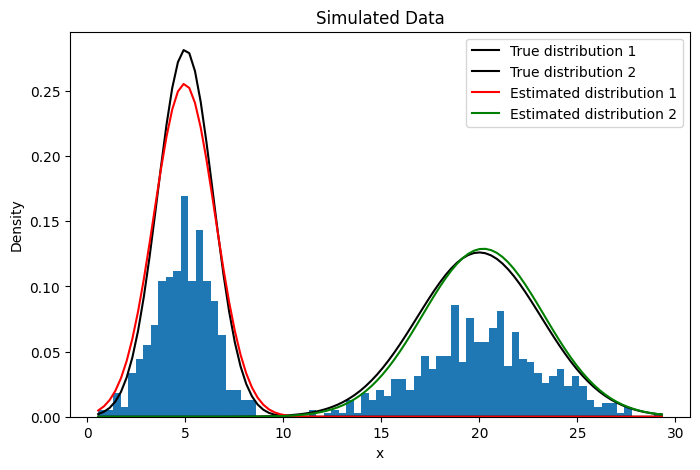

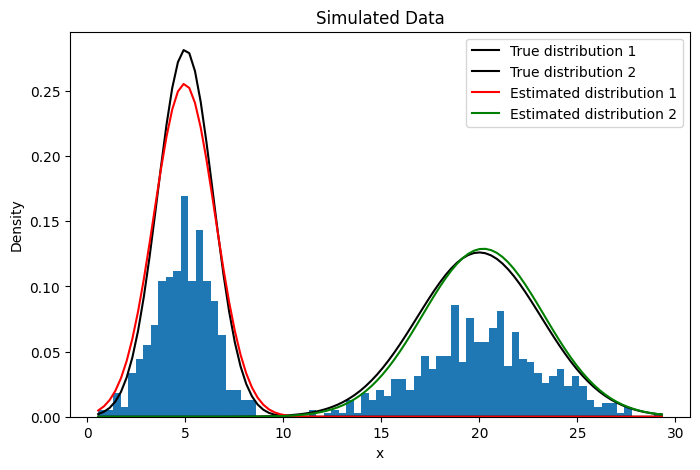

In [95]:
X1=np.random.normal(20,np.sqrt(10),500)
X2=np.random.normal(5,np.sqrt(2),500)
X=np.array(list(X1)+list(X2))

n_comp=gauss.BIC_gmm(X)
em1=gauss.GaussianEM(X,n_comp,[])
t=gauss.findThreshold2(em1)
PlotGMM(X,em1,10,t,"Simulated Data",[],[20,5],[10,2])

### 3 components

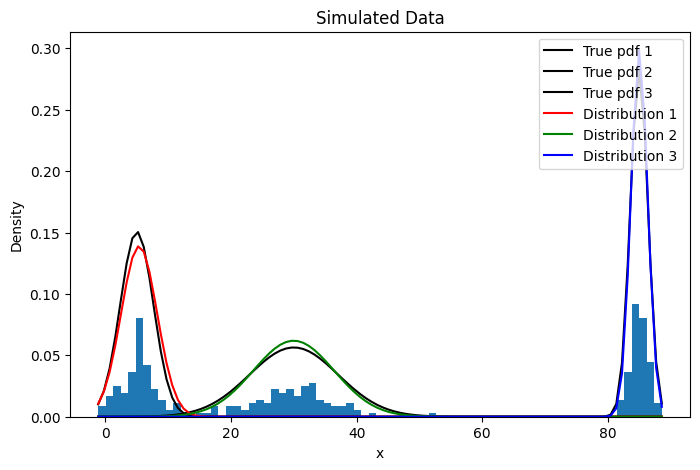

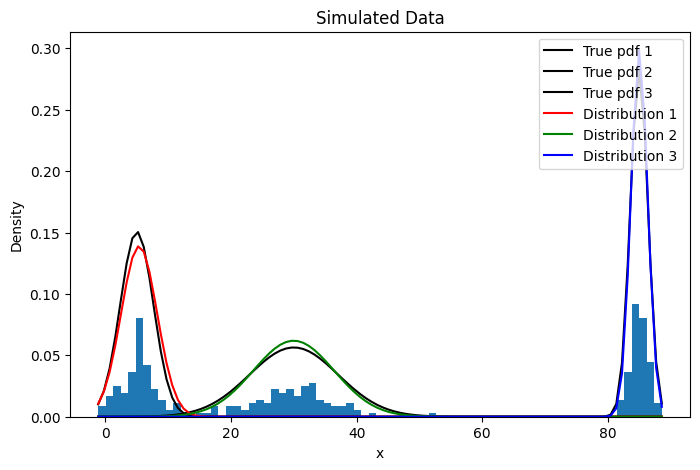

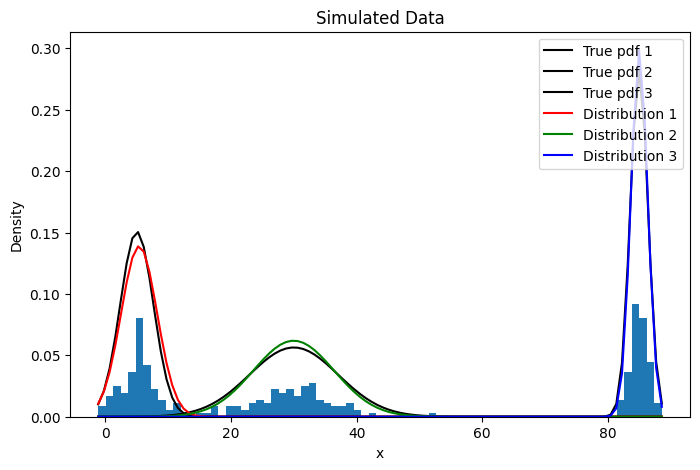

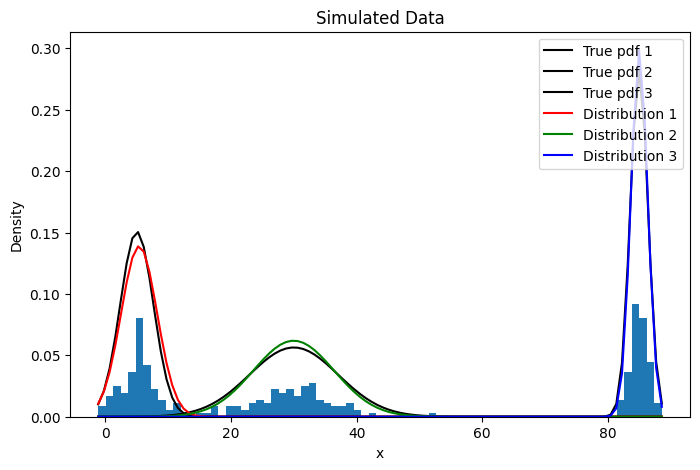

In [91]:
X1=np.random.normal(85,np.sqrt(2),100)
X2=np.random.normal(30,np.sqrt(50),100)
X3=np.random.normal(5,np.sqrt(7),100)
X=np.array(list(X1)+list(X2)+list(X3))

n_comp=gauss.BIC_gmm(X)
em1=gauss.GaussianEM(X,n_comp,[])
t=gauss.findThreshold2(em1)
PlotGMM(X,em1,10,[],"Simulated Data",[],[85,30,5],[2,50,7])

### 4 components

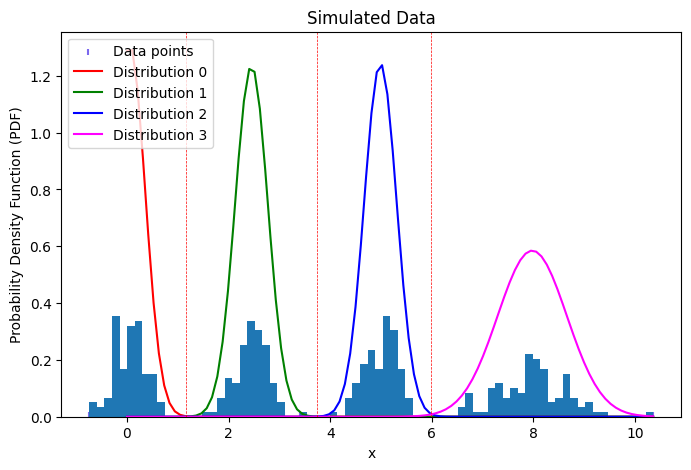

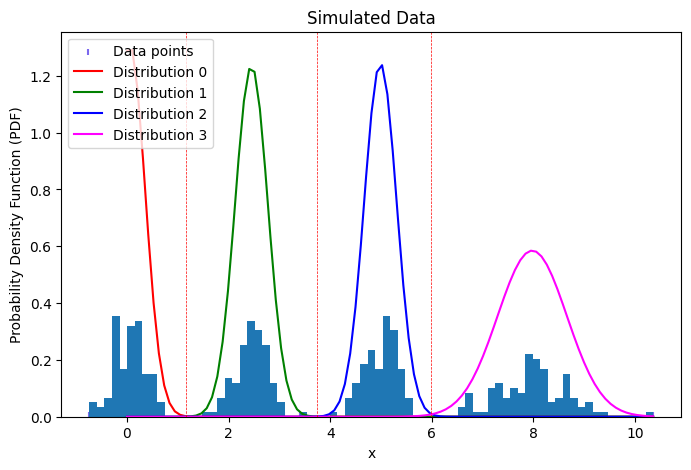

In [10]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em1=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold1(D,4,em1)
gauss.PlotGMM(D,em1,10,t,"Simulated Data",[],[],[])

# KIR data

In [53]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

In [54]:
a=list(B)
KIR=a[1:]
KIR.remove("KIR3DL3")

KIR3DP1 [{'Mean': 0.250239301428094, 'Variance': 0.00015459648153784604, 'Weight': 0.06521739130434782}, {'Mean': 0.4807019249488817, 'Variance': 0.00035750634592191313, 'Weight': 0.8913043478260869}, {'Mean': 0.6980945072748318, 'Variance': 0.00013393016999382632, 'Weight': 0.043478260869565265}]
KIR2DS5 [{'Mean': 0.001007089848322857, 'Variance': 4.603604566812024e-05, 'Weight': 0.6}, {'Mean': 0.5073031976939889, 'Variance': 0.000901429572959075, 'Weight': 0.31739130433949314}, {'Mean': 0.9137999968991911, 'Variance': 0.0018401341917385389, 'Weight': 0.07391304348278278}, {'Mean': 1.3274290390846288, 'Variance': 0.0031531520221786498, 'Weight': 0.008695652177724049}]
KIR2DL3 [{'Mean': 0.002603175940582968, 'Variance': 3.6319343719344635e-05, 'Weight': 0.12173913043478261}, {'Mean': 0.6598742205284993, 'Variance': 0.001041539959875519, 'Weight': 0.3739130434727865}, {'Mean': 1.2526026193644157, 'Variance': 0.0024452070535100775, 'Weight': 0.5043478260924309}]
KIR2DP1 [{'Mean': 0.00251

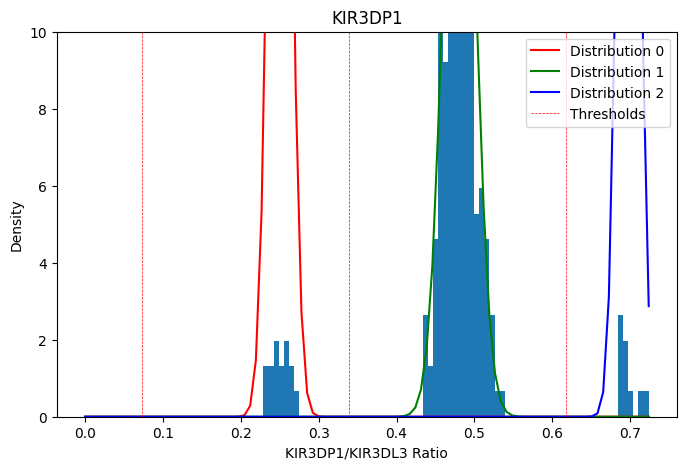

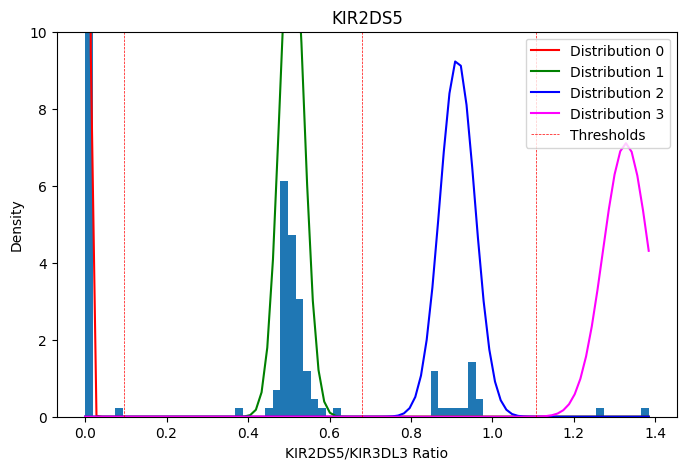

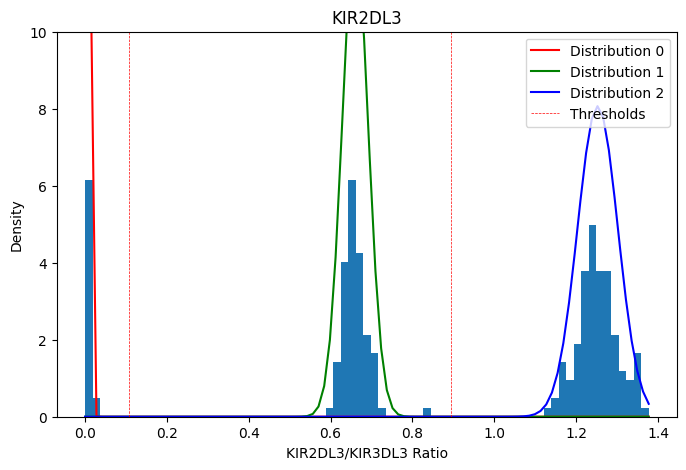

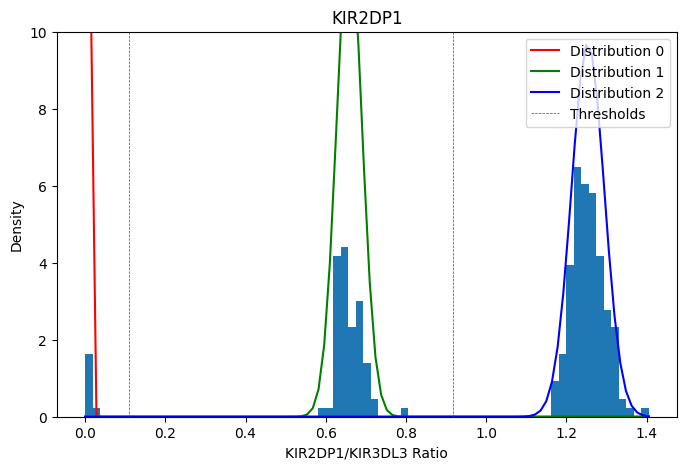

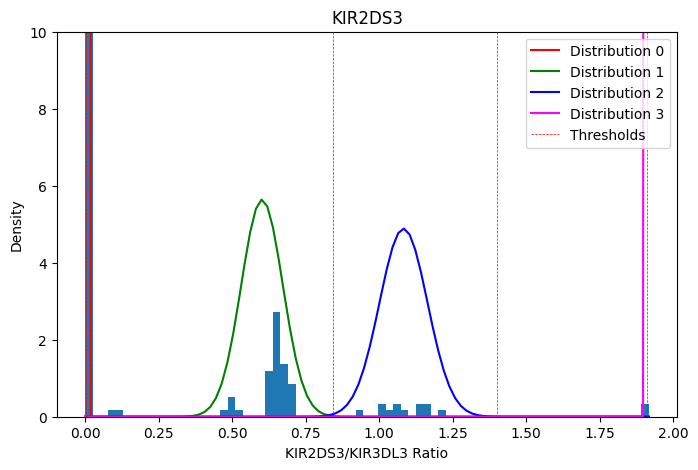

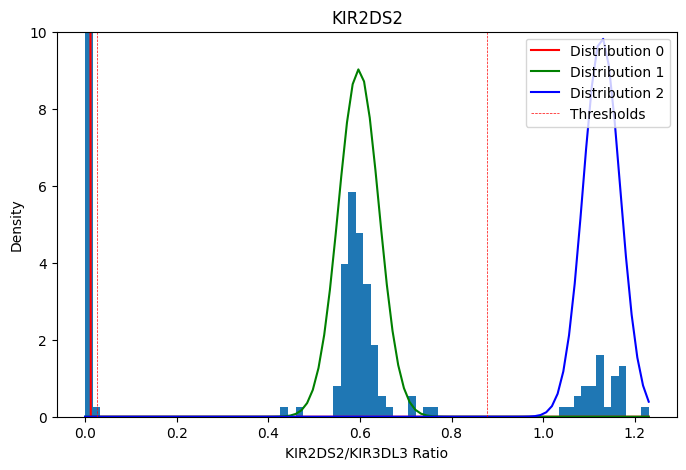

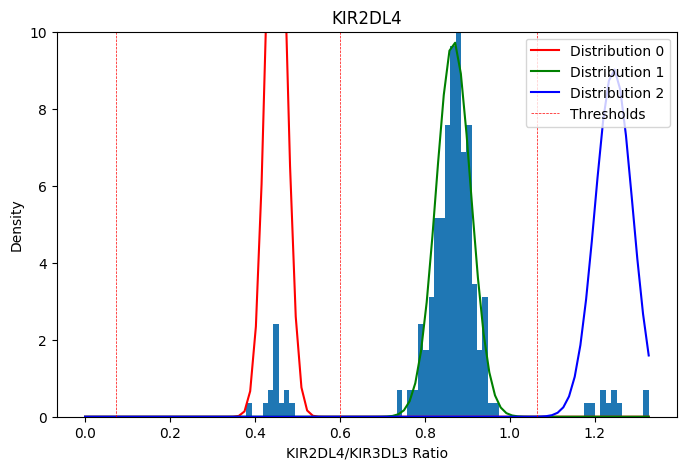

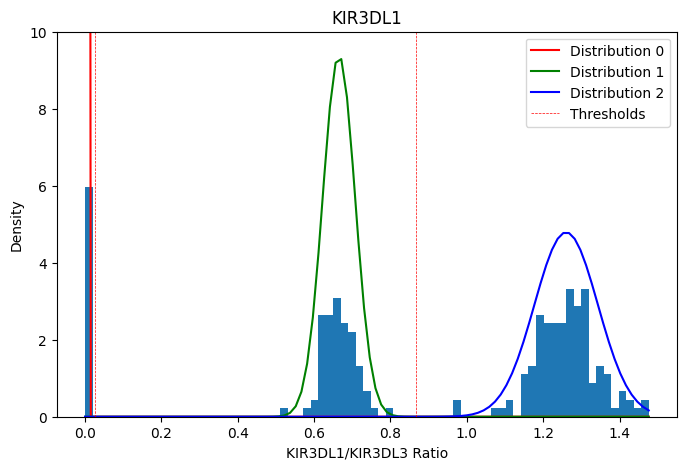

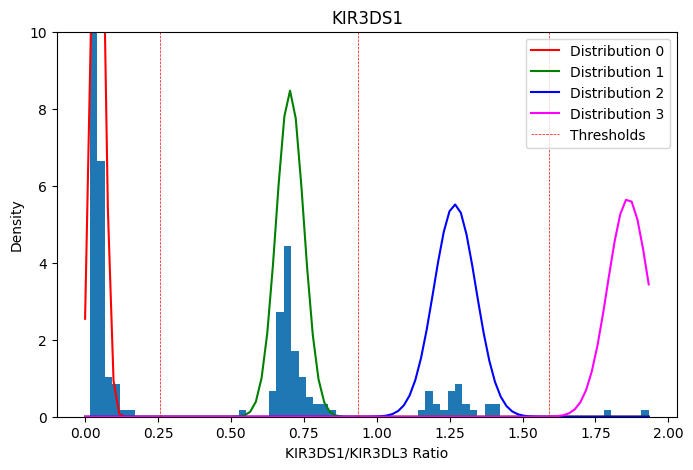

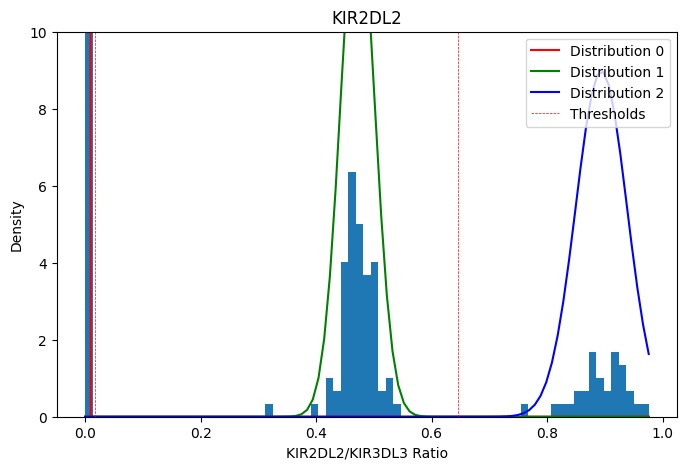

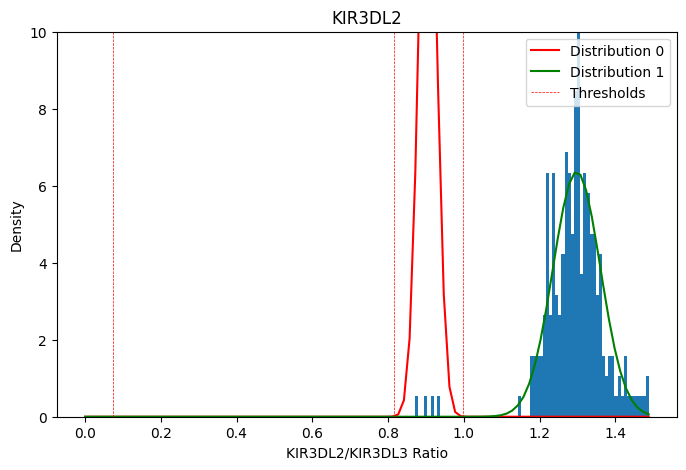

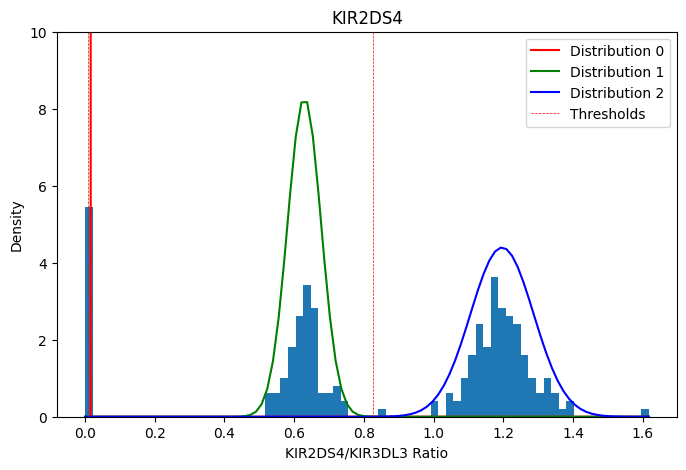

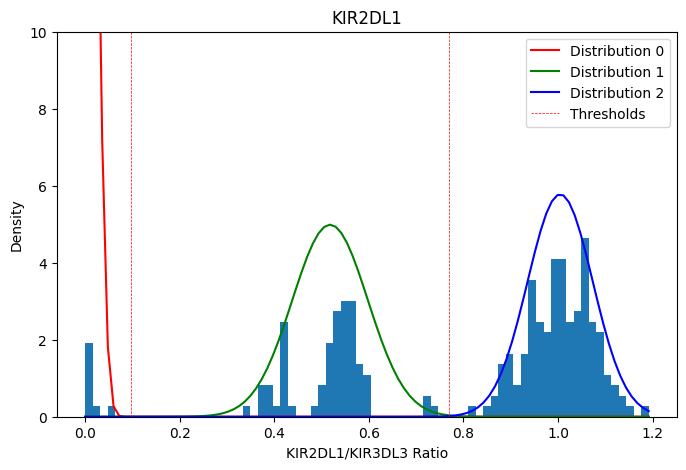

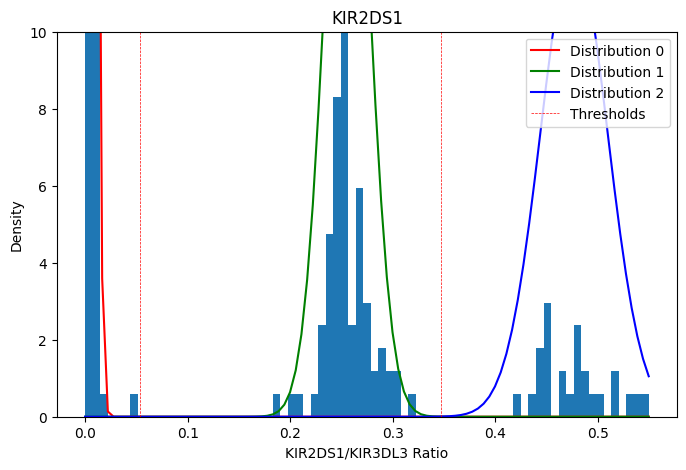

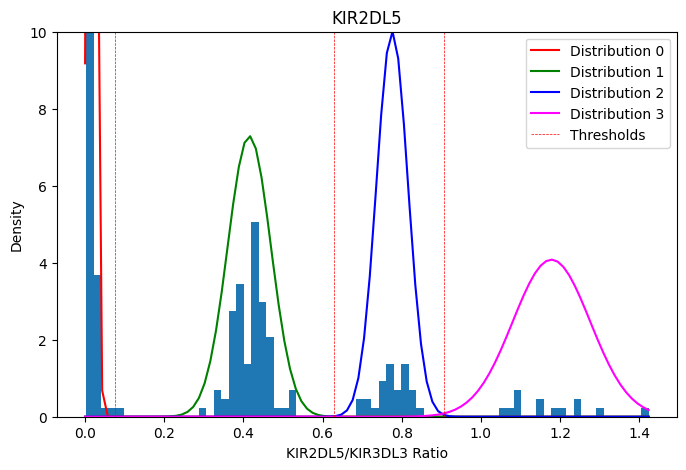

In [57]:
import csv

sample_n=B.iloc[:,0].to_numpy()
threshold_all=list()
data_lowprob_all=list()
for i in KIR:
    X=B["{}".format(i)].to_numpy()
    
    def main(X):

        n_components=gauss.BIC_gmm(X)
        low_prob_proportion=len(X)
        while n_components<6:
            em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
            low_prob_proportion,data_lowprob=gauss.check_prob2(pxj,em)
            if low_prob_proportion>=(0.03*len(X)):
                n_components=n_components+1
            elif gauss.check_mean_dis(em)==False:
                n_components=n_components-1
            else:
                break
        return(em,pxj)
    
    em,pxj=main(X)
    
    # Thresholds
    thresholds=gauss.findThreshold2(em)

    mean_ghost=[]
    var_ghost=[]
    # Check threshold of 0 copies
    if gauss.check_gaps_below(em)==(False,0):
        mean_ghost.append(1e-4)
        var_ghost.append(1e-6)
        thresholds.append(0.07277145626097836)
    elif gauss.check_gaps_below(em)==(False,1):
        last_iter=em[-1]
        mean_ghost.append(1e-4)
        var_ghost.append(1e-6)
        
        thresholds.append(0.07277145626097836)
        
        new_thres=last_iter[0]['Mean']-(3.89*np.sqrt(last_iter[0]['Variance']))
        mean_ghost.append((min(thresholds)+new_thres)/2)
        var_ghost.append((last_iter[0]['Variance']))
        thresholds.append(new_thres)   

    # Check if there is "double gap", add threshold if yes.
    if gauss.check_gaps_means(em)[0]==True:
        gauss_index=gauss.check_gaps_means(em)[1]
        last_iter=em[-1]
        extra_threshold_1=last_iter[gauss_index]['Mean']+(3.89*np.sqrt(last_iter[gauss_index]['Variance']))
        dis_thres=extra_threshold_1-thresholds[-1]
        extra_threshold_2=last_iter[gauss_index+1]['Mean']-(3.89*np.sqrt(last_iter[gauss_index+1]['Variance']))
        thresholds=thresholds[:-1]

        mean_ghost.append((extra_threshold_1+extra_threshold_2)/2)
        var_ghost.append(((extra_threshold_2-extra_threshold_1)/6.58)**2)

        thresholds.append(extra_threshold_1)
        thresholds.append(extra_threshold_2)
    thresholds.sort()

    threshold_all.append(thresholds)

    # Sample numbers with low probability
    prop_lowprob,data_lowprob=gauss.check_prob2(pxj,em)
    lowprob_sample_number=list()
    for k in data_lowprob:
        lowprob_sample_number.append(sample_n[k])
        
    data_lowprob_all.append(lowprob_sample_number)
    
    #Output the figures
    fig=gauss.PlotGMM(X,em,50,thresholds,i,10,[],[])
    output_path= "/Users/devitahalim/Documents/GitHub/scie30001-project/output/plots/plot_slides_"
    # fig.savefig(output_path+(i))

    print(i, em[-1])

### Create CSV for thresholds

In [6]:
for i in range (len(KIR)):
    threshold_all[i].insert(0,KIR[i])

# CSV for thresholds
threshold_header=["","0-1","1-2","2-3","3-4","4-5","5-6"]
threshold_data=threshold_all
with open('/Users/devitahalim/Documents/GitHub/scie30001-project/output/output_threshold.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(threshold_header)
    # Use writerows() not writerow()
    writer.writerows(threshold_data)
    

### Create CSV for low likelihood data

In [7]:

# CSV for low probability
lowprob_header=["","Sample number with low likelihood"]
lowprob_data=list()
for i in range(len(KIR)):
    k=KIR[i],data_lowprob_all[i]
    lowprob_data.append(k)

with open('/Users/devitahalim/Documents/GitHub/scie30001-project/output/output_outliers.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(lowprob_header)
    # Use writerows() not writerow()
    writer.writerows(lowprob_data)

### CSV for parameters

In [59]:
emlist=[['KIR3DP1',[{'Mean': 0.250239301428094, 'Variance': 0.00015459648153784604, 'Weight': 0.06521739130434782}, {'Mean': 0.4807019249488817, 'Variance': 0.00035750634592191313, 'Weight': 0.8913043478260869}, {'Mean': 0.6980945072748318, 'Variance': 0.00013393016999382632, 'Weight': 0.043478260869565265}]],
['KIR2DS5', [{'Mean': 0.001007089848322857, 'Variance': 4.603604566812024e-05, 'Weight': 0.6}, {'Mean': 0.5073031976939889, 'Variance': 0.000901429572959075, 'Weight': 0.31739130433949314}, {'Mean': 0.9137999968991911, 'Variance': 0.0018401341917385389, 'Weight': 0.07391304348278278}, {'Mean': 1.3274290390846288, 'Variance': 0.0031531520221786498, 'Weight': 0.008695652177724049}]]
,['KIR2DL3', [{'Mean': 0.002603175940582968, 'Variance': 3.6319343719344635e-05, 'Weight': 0.12173913043478261}, {'Mean': 0.6598742205284993, 'Variance': 0.001041539959875519, 'Weight': 0.3739130434727865}, {'Mean': 1.2526026193644157, 'Variance': 0.0024452070535100775, 'Weight': 0.5043478260924309}]]
,['KIR2DP1' ,[{'Mean': 0.002518583472601108, 'Variance': 3.868808018124263e-05, 'Weight': 0.03478260869565218}, {'Mean': 0.658584905926609, 'Variance': 0.0010252717874594899, 'Weight': 0.3086956533878779}, {'Mean': 1.2533949031712883, 'Variance': 0.0016881418876619999, 'Weight': 0.65652173791647}]]
,['KIR2DS3', [{'Mean': 0.00023312018670542818, 'Variance': 7.559652896725402e-08, 'Weight': 0.7478260869416665}, {'Mean': 0.601639263295555, 'Variance': 0.005002483361536954, 'Weight': 0.19130929970385188}, {'Mean': 1.0826693834913936, 'Variance': 0.0066637599994720876, 'Weight': 0.05216896118056859}, {'Mean': 1.91535409239478, 'Variance': 1.0654519368042196e-06, 'Weight': 0.008695652173913044}]]
,['KIR2DS2' ,[{'Mean': 0.0007672592409012813, 'Variance': 3.4411610400714653e-06, 'Weight': 0.5043478260869565}, {'Mean': 0.5970988373457317, 'Variance': 0.00195519835010554, 'Weight': 0.3782608695652174}, {'Mean': 1.1272816467963853, 'Variance': 0.001640022882443198, 'Weight': 0.11739130434782609}]]
,['KIR2DL4', [{'Mean': 0.4498334780835904, 'Variance': 0.000577836430681368, 'Weight': 0.06521739130434782}, {'Mean': 0.8675365770355256, 'Variance': 0.0016701559301145878, 'Weight': 0.8913043478181567}, {'Mean': 1.245097540497517, 'Variance': 0.0019538447466996315, 'Weight': 0.04347826087749545}]]
,['KIR3DL1', [{'Mean': 0.001608796751460074, 'Variance': 2.689379381031728e-06, 'Weight': 0.11739130434782609}, {'Mean': 0.6648761364588862, 'Variance': 0.0018053847812361471, 'Weight': 0.3217390989559131}, {'Mean': 1.2600990671860677, 'Variance': 0.006934427285873001, 'Weight': 0.5608695966962608}]]
,['KIR3DS1', [{'Mean': 0.04376171736826134, 'Variance': 0.0004887342287820332, 'Weight': 0.5782608695652174}, {'Mean': 0.7024667810512855, 'Variance': 0.0022180909385007613, 'Weight': 0.3086956471657097}, {'Mean': 1.2680147381874733, 'Variance': 0.005236176233279236, 'Weight': 0.10434783109363761}, {'Mean': 1.8623493360021866, 'Variance': 0.0049562727683602256, 'Weight': 0.008695652175435315}]]
,['KIR2DL2', [{'Mean': 0.0007918706817813407, 'Variance': 1.0459243475011914e-06, 'Weight': 0.508695652173913}, {'Mean': 0.4719418230211329, 'Variance': 0.000885112389278561, 'Weight': 0.3565217391304347}, {'Mean': 0.8940220104001021, 'Variance': 0.0019727730303934175, 'Weight': 0.13478260869565226}]]
,['KIR3DL2', [{'Mean': 0.9046917938245493, 'Variance': 0.0005325625632399505, 'Weight': 0.01739129363020933}, {'Mean': 1.298174031000689, 'Variance': 0.003931358948833913, 'Weight': 0.9826087063697907}]]
,['KIR2DS4', [{'Mean': 0.00034529729681489525, 'Variance': 4.103378544624095e-07, 'Weight': 0.11739130434782609}, {'Mean': 0.6290488833297202, 'Variance': 0.00231749173207173, 'Weight': 0.3304834041554519}, {'Mean': 1.196329802493795, 'Variance': 0.00823252885491404, 'Weight': 0.552125291496722}]]
,['KIR2DL1', [{'Mean': 0.01029500837899716, 'Variance': 0.00027762680430820413, 'Weight': 0.039130430355568735}, {'Mean': 0.5179424117598288, 'Variance': 0.006394724730619253, 'Weight': 0.31690211608177765}, {'Mean': 1.0044009263147058, 'Variance': 0.004766220682762394, 'Weight': 0.6439674535626535}]]
,['KIR2DS1', [{'Mean': 0.003951458639684127, 'Variance': 2.6229314672480448e-05, 'Weight': 0.5521739126772349}, {'Mean': 0.2554993016965426, 'Variance': 0.00045840937729610637, 'Weight': 0.3347819763869724}, {'Mean': 0.4767652279677343, 'Variance': 0.0010858231181056803, 'Weight': 0.11304411093579278}]]
,['KIR2DL5', [{'Mean': 0.016345941964151886, 'Variance': 8.671659798427096e-05, 'Weight': 0.43478240623895636}, {'Mean': 0.4148847584696941, 'Variance': 0.002992956070544712, 'Weight': 0.38695743002819155}, {'Mean': 0.7759285597377485, 'Variance': 0.0015888577131297188, 'Weight': 0.12170877101318832}, {'Mean': 1.1783547111116586, 'Variance': 0.009559400618261268, 'Weight': 0.05655139271966369}]]]

In [70]:
(len(emlist[0][1]))

3

In [74]:
par_header=["KIR genes","Means","Variances","Weights"]
par_data=list()
for i in range (len(emlist)):
    kirs=emlist[i][0]
    means_=[emlist[i][1][j]['Mean'] for j in range(len(emlist[i][1]))]
    vars_=[emlist[i][1][j]['Variance'] for j in range(len(emlist[i][1]))]
    weights_=[emlist[i][1][j]['Weight'] for j in range(len(emlist[i][1]))]
    a=[kirs,means_,vars_,weights_]
    par_data.append(a)

with open('/Users/devitahalim/Documents/GitHub/scie30001-project/output/output_parameters.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(par_header)
    # Use writerows() not writerow()
    writer.writerows(par_data)

### KIR Examples

In [79]:
vars=[0.00015459648153784604, 0.00035750634592191313, 0.00013393016999382632,4.603604566812024e-05, 0.000901429572959075, 0.0018401341917385389, 0.0031531520221786498,3.6319343719344635e-05, 0.001041539959875519, 0.0024452070535100775,
3.868808018124263e-05, 0.0010252717874594899, 0.0016881418876619999,
7.559652896725402e-08, 0.005002483361536954, 0.0066637599994720876, 1.0654519368042196e-06,
3.4411610400714653e-06, 0.00195519835010554, 0.001640022882443198,
0.000577836430681368, 0.0016701559301145878, 0.0019538447466996315,
2.689379381031728e-06, 0.0018053847812361471, 0.006934427285873001,
0.0004887342287820332, 0.0022180909385007613, 0.005236176233279236, 0.0049562727683602256,
1.0459243475011914e-06, 0.000885112389278561, 0.0019727730303934175,
0.0005325625632399505, 0.003931358948833913,4.103378544624095e-07, 0.00231749173207173, 0.00823252885491404,
0.00027762680430820413, 0.006394724730619253, 0.004766220682762394,
2.6229314672480448e-05, 0.00045840937729610637, 0.0010858231181056803,
8.671659798427096e-05, 0.002992956070544712, 0.0015888577131297188, 0.009559400618261268]
np.min(vars)

7.559652896725402e-08

In [48]:
np.linspace(1,10,3)

array([ 1. ,  5.5, 10. ])

In [41]:
# KIR with 4 number of components
KIR2DS3_data=B["KIR2DS3"].to_numpy()

KIR2DS3_data.sort()

[{'Mean': 0.0039514586396841266,
  'Variance': 2.6229314672480448e-05,
  'Weight': 0.5521739126772349},
 {'Mean': 0.2554993016965426,
  'Variance': 0.00045840937729610637,
  'Weight': 0.3347819763869724},
 {'Mean': 0.4767652279677343,
  'Variance': 0.0010858231181056805,
  'Weight': 0.11304411093579278}]

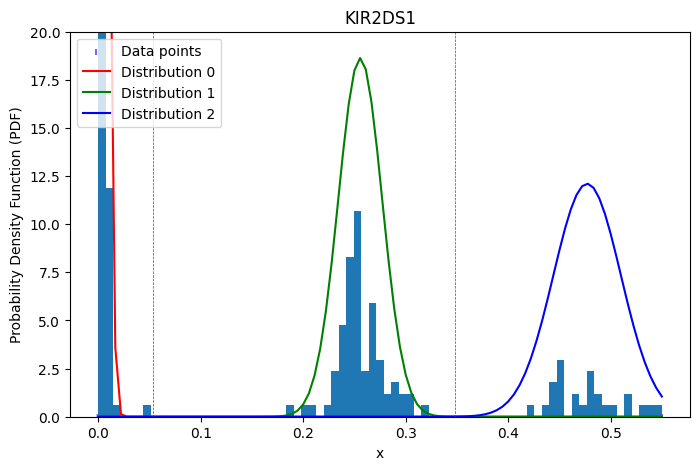

In [53]:
KIR2DS1=B["KIR2DS1"].to_numpy()
KIR2DS1.sort()

def main2(X):

    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob_proportion=len(X)
    while n_components<6:
        em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
        low_prob_proportion=gauss.check_prob2(pxj,em)
        if low_prob_proportion>=(0.05*len(X)):
            n_components=n_components+1
        elif gauss.check_mean_dis(em)==False:
            n_components=n_components-1
        else:
            break
    return(em)

n_components=gauss.BIC_gmm(KIR2DS1)
em_KIR2DS1,pxj_KIR2DS1=gauss.EMGMM_varconstraint(KIR2DS1,3,[])
t_KIR2DS1=gauss.findThreshold2(em_KIR2DS1)
gauss.PlotGMM(KIR2DS1,em_KIR2DS1,10,t_KIR2DS1,"KIR2DS1",20)

gauss.check_mean_dis(em_KIR2DS1)
em_KIR2DS1[-1]

### Use sklearn.mixture.GaussianMixture

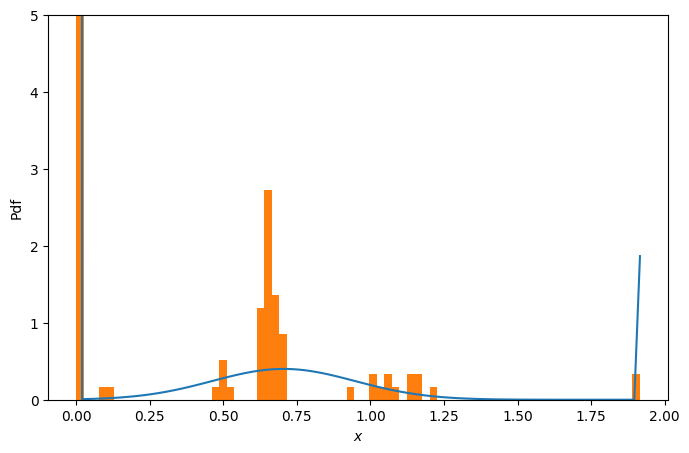

In [4]:
X=KIR2DS3_data
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N=np.arange(1, 5)
models=[None for i in range(len(N))]

for i in range(len(N)):
    models[i]=GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC=[m.aic(X) for m in models]
BIC=[m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
# M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
# log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
# resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
# pdf2=np.exp(log_prob2)


# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.ylim(0,5)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()


### Number of components adjustment (lots of data having low likelihood)

In [5]:
def check_prob2(pxj,iteration_data):
    
    last_iter=iteration_data[-1]
    # Rearrange array into individual likelihoof of each data points
    prob_indv= [None for i in range(len(pxj[0]))]
    for i in range(len(pxj[0])):
        prob_indv[i]=[pxj[j][i] for j in range (len(pxj))]

    # Calculate the minimum likelihood for each gaussian (99.7%)
    min_likelihood=list()
    for j in range(len(last_iter)):
        indv_likelihood=gauss.GaussianPDF((last_iter[j]['Mean']+(2.967738*np.sqrt(last_iter[j]['Variance']))),last_iter[j]['Mean'],last_iter[j]['Variance'])
        min_likelihood.append(indv_likelihood)
    
    # Create list of elements that have high likelihood of belonging to any gaussian
    highprob=list()
    for i in range (len(pxj[0])):
        indv_high_prob=[l1 for l1,l2 in zip(prob_indv[i],min_likelihood) if l1>l2]
        highprob.append(indv_high_prob)
    
    print(min_likelihood)
    # Identify the one with no adequate likelihood of belonging to any gaussian
    n_lowprob=list()
    for i in range(len(highprob)):
        if highprob[i]==[]:
            n_lowprob.append(i)

    return (len(n_lowprob))

In [45]:
em_KIR2DS3,pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),[])

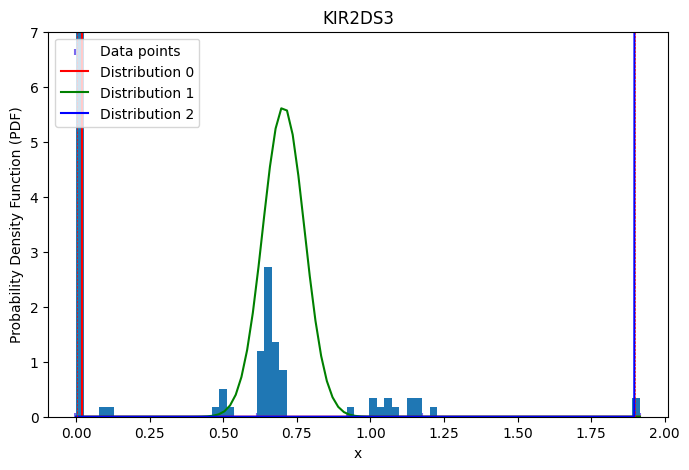

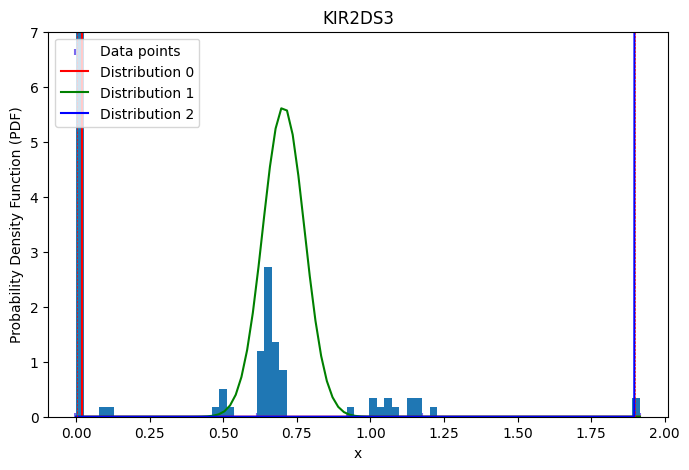

In [46]:
# Plot
t_KIR2DS3=gauss.findThreshold2(em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,em_KIR2DS3,10,t_KIR2DS3,'KIR2DS3',7)

In [47]:
KIR2DL3_data=B["KIR2DL3"].to_numpy()
KIR2DL3_data.sort()

In [48]:
em_KIR2DL3,pxj_2DL3=gauss.EMGMM_varconstraint(KIR2DL3_data,gauss.BIC_gmm(KIR2DL3_data),[])

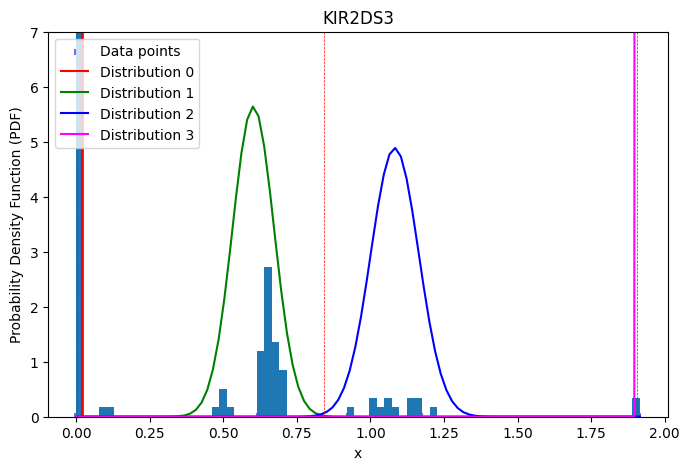

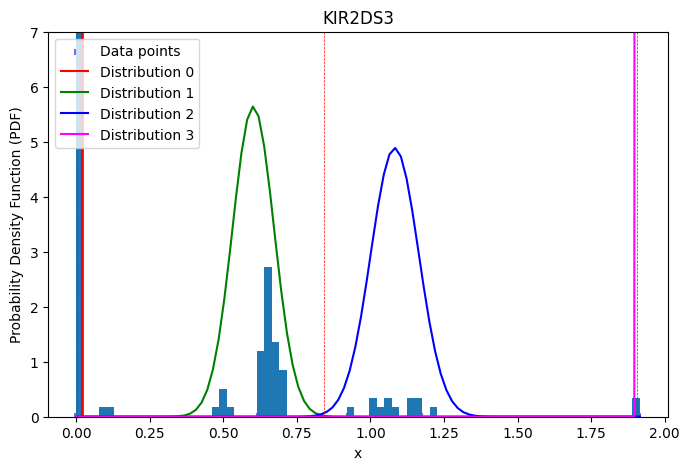

In [55]:
new_em_KIR2DS3,new_pxj_KIR2DS3=main(KIR2DS3_data)
t_KIR2DS3=gauss.findThreshold2(new_em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,new_em_KIR2DS3,10,t_KIR2DS3,'KIR2DS3',7)

### Number of components adjustments (mean to close together)

In [14]:
# Calculate the distance between the means
def check_mean_dis(iteration_data):
    means_list=list()
    for i in range (len(iteration_data[-1])):
        means_list.append(iteration_data[-1][i]['Mean'])
    
    means_list.sort()
    print("Means: ", means_list)
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    print("Distance between means :",means_diff)

    def all_meansdiff(means_diff):
        for i in means_diff:
            if i <0.4:
                return False
        return True
    return (all_meansdiff(means_diff))

# # Reduce number of components if the distance is less than 0.4
# if all_meansdiff(means_diff)==False:
#     index=index-1

### Test weird case where n_components=5

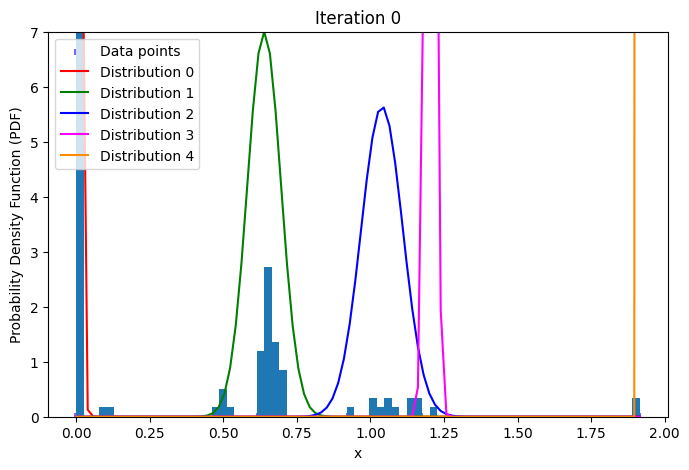

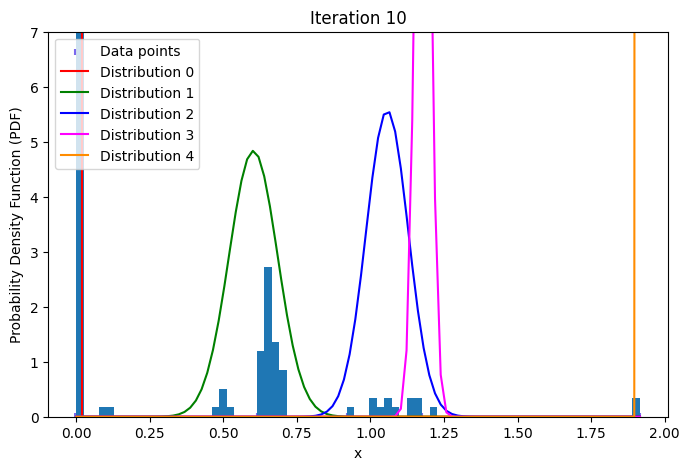

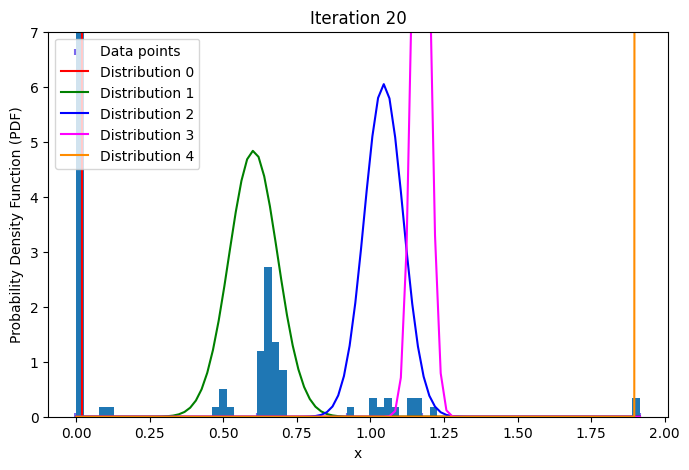

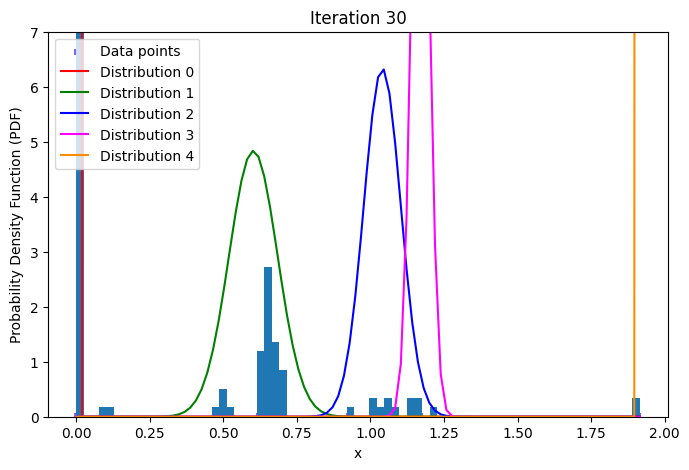

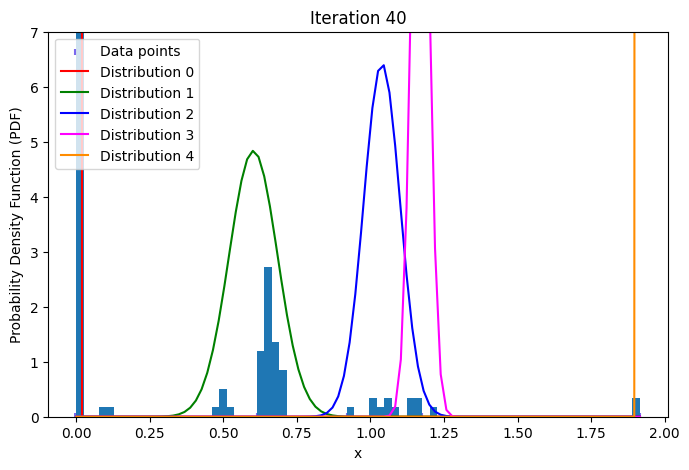

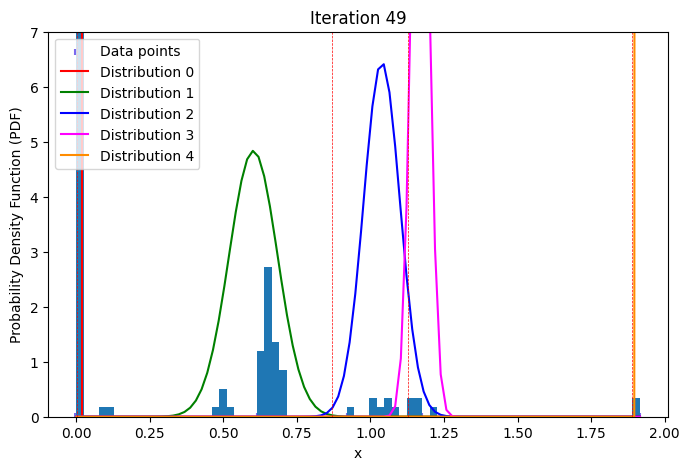

In [15]:
weird_em_2DS3,weird_pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,5,[])
weird_t=gauss.findThreshold2(weird_em_2DS3)
gauss.PlotGMM(KIR2DS3_data,weird_em_2DS3,10,weird_t,7)